In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from cnn_build import *

Using TensorFlow backend.


## Loading the augmented data

In [10]:
augmented_ships = np.load('output/ships_complete.pickle')
augmented_icebergs = np.load('output/icebergs_complete.pickle')

target_train = np.concatenate( (np.zeros( (augmented_ships.shape[0],1) ),\
                             np.ones( (augmented_icebergs.shape[0],1) ) ) )
print(target_train.shape)

train_data = np.concatenate( (augmented_ships, augmented_icebergss) )

print(train_data.shape)

(3208, 1)
(3208, 75, 75, 3)


## Split data into training and test set

In [12]:
from sklearn.model_selection import train_test_split

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(train_data, target_train,\
                                                            random_state=1, train_size=0.75)
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=10) # do 10 more rounds after stopping condition

/Users/jessie/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


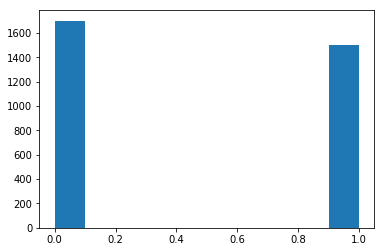

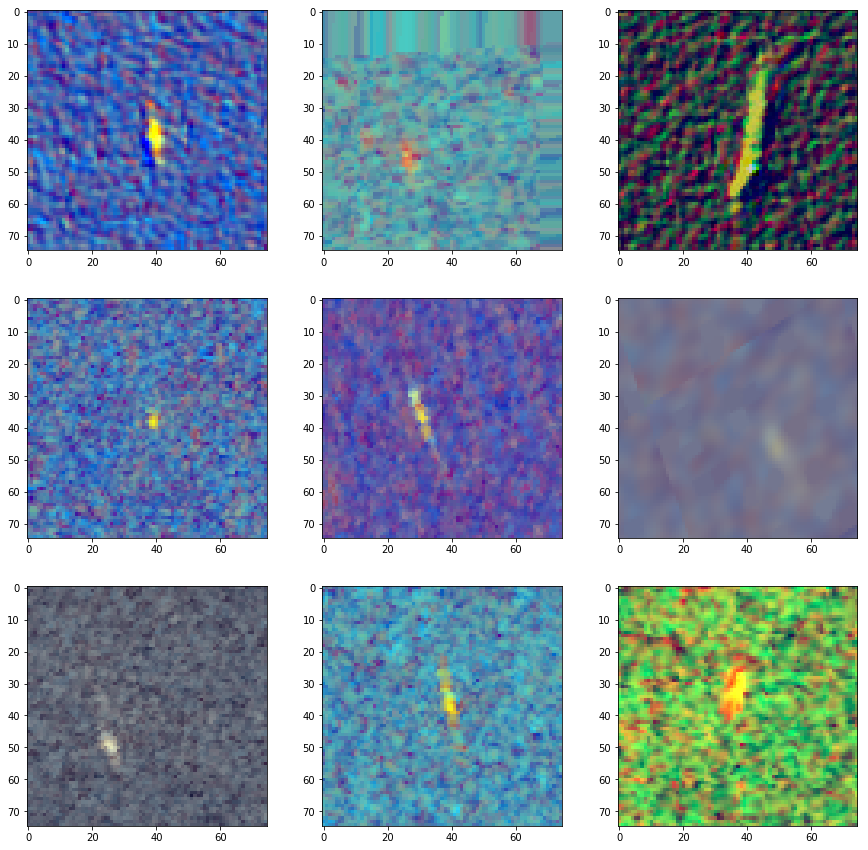

In [20]:
import matplotlib.pyplot as plt
plt.hist(target_train)
plt.show()

fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = train_data[i*10, :, :]
    ax.imshow(arr)   
plt.show()

In [14]:
gmodel=getModel(input_shape = (75, 75, 3))
gmodel.fit(X_train_cv, y_train_cv,
          batch_size=24,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

KeyboardInterrupt: 